In [1]:
# import imgaug as ia
import imgaug.augmenters as iaa
# import imgaug.parameters as iap

general_augmenter = iaa.Sequential(
    [   
        # Noise
        iaa.Sometimes(0.2, 
            iaa.OneOf([
                iaa.AddElementwise((-50,50)),
                iaa.AdditiveLaplaceNoise(scale=(1,15)),
                iaa.AdditivePoissonNoise((1, 10)),
                iaa.AdditiveGaussianNoise(scale=(1, 20)), 
            ])
        ),

        # Brightness + Contrast
        iaa.Sometimes(0.15, 
            iaa.OneOf([
                iaa.Multiply((0.5, 1.75)),
                iaa.AddToBrightness((-30,50)),
                iaa.MultiplyBrightness((0.75, 1.75)),
                iaa.MultiplyAndAddToBrightness(mul=(0.75, 1.25), add=(-20, 20)),
                iaa.pillike.EnhanceBrightness(),
                # Change contrast
                iaa.LinearContrast((0.75, 1.25)),
                iaa.GammaContrast((0.75, 1.25)),
                iaa.LogContrast(gain=(0.75, 1.5)),
                iaa.pillike.Autocontrast((2, 6)),
                iaa.pillike.EnhanceContrast()
            ])    
        ),

        # Slightly image degradation
        iaa.Sometimes(0.35,
            iaa.OneOf([
                iaa.imgcorruptlike.Pixelate(severity=(1,3)),
                iaa.UniformColorQuantization(n_colors=(20, 256)),
                # iaa.imgcorruptlike.ElasticTransform(severity=(1,5)),
                iaa.pillike.FilterSmoothMore(),
                iaa.imgcorruptlike.JpegCompression(severity=(1,4))
            ])
        ),
        
        # slightly blur augment
        iaa.Sometimes(0.35,
            iaa.OneOf([
                iaa.GaussianBlur((1, 4)),
                iaa.AverageBlur(k=(1, 6)),
                iaa.pillike.FilterBlur(),
                iaa.MedianBlur(k=(1,5)),
                iaa.MotionBlur(k=(3, 10), angle=[-45, 45]),
                iaa.imgcorruptlike.DefocusBlur(severity=(1,5))
            ]),
        ),
        
        # Color
        iaa.Sometimes(0.2, 
            iaa.OneOf([
                iaa.ChannelShuffle(0.2),
                iaa.ChangeColorTemperature((2000, 20000)),
                iaa.AddToHue((-20, 20)),
                iaa.MultiplyHue((0.75, 1.25)),
                iaa.AddToHueAndSaturation((-20, 10), per_channel=True),
                iaa.AddToSaturation((-30, 20)),
                iaa.MultiplySaturation((0.75, 1.25)),
                iaa.Grayscale(alpha=(0.0, 0.75)),
                iaa.pillike.EnhanceColor(),
            ]),
        ),
        iaa.Sometimes(0.05, iaa.CoarseDropout(0.1, size_percent=0.0025, per_channel=1)),
    ]
)

In [31]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [25]:
img = Image.open("1_274.jpg")
arr = np.expand_dims(np.array(img), 0)
# arr = np.array(img)
arr.shape

(1, 3456, 3112, 3)

In [26]:
new = general_augmenter(images=arr)

In [28]:
new.shape

(1, 3456, 3112, 3)

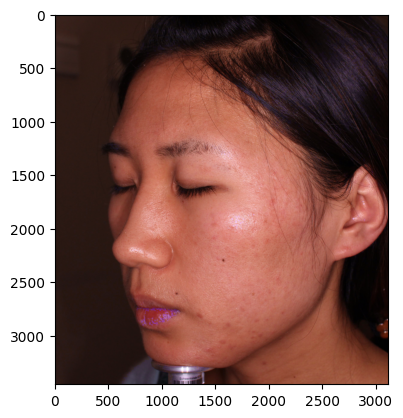

In [30]:
plt.imshow(new[0])